In [1]:
from scipy import stats
import pickle as pkl

In [2]:
from sklearn.utils import resample

In [3]:
from scipy import stats
import numpy as np
from statistics import mean, median

In [4]:
def ranksumdiff(a,b):
	totalpoints = []
	for i in a:
		totalpoints.append(i)
	for i in b:
		totalpoints.append(i)

	totalpoints.sort()
	rank_points = {}
	c = 1
	for i in totalpoints:
		if(i not in rank_points):
			rank_points[i] = []
		rank_points[i].append(c)
		c+=1
	rank_value = {}
	for i in rank_points:
		rank_value[i] = mean(rank_points[i])
	ars = []
	brs = []

	for i in a:
		ars.append(rank_value[i])

	for i in b:
		brs.append(rank_value[i])

	return mean(ars) - mean(brs)

def bootstrap(a, b, u0, iterations):
	n_iter = iterations
	m = len(a)
	n = len(b)
	centreu = (m*n)/2
	totallist = []
	for i in a:
		totallist.append(i)
	for i in b:
		totallist.append(i)
	count = 0
	totallist = np.asarray(totallist)
	for i in range(n_iter):
		sample = np.random.choice(totallist, m+n, replace=True)
		samplea = sample[:m]
		sampleb = sample[m:]
		u,p = stats.mannwhitneyu(samplea, sampleb, alternative='two-sided')
		if(abs(u-centreu)>=abs(u0-centreu)):
			count+=1
	return count/n_iter

def mannwhitneyu_bootstrap(low, high, iterations):
	u,p = stats.mannwhitneyu(low, high, alternative='two-sided')
	if ranksumdiff(low, high)>0:
		dom = "Low"
	else:
		dom = "High"
	bpval = ''
	if(p<0.05):
		bpval = bootstrap(low, high, u, iterations)
	return str(u)+", "+str(p)+"("+dom+", "+str(bpval)+")"

In [5]:
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2, alternative='two-sided')
    
    return (u_statistic, p_value)


In [6]:
import numpy as np
def median(x):
    return np.median(np.array(x))


In [7]:
def Get_Users_topandbottom(dataset, pers, num):
    distril = []
    distrih = [] 

    temp1 = {}
    temp2 = {}
    for i in dataset:
        temp1[i] = dataset[i][pers]
        temp2[i] = dataset[i][pers]

    temp1 = dict(sorted(temp1.items(), key=lambda item: item[1], reverse=False))
    temp2 = dict(sorted(temp2.items(), key=lambda item: item[1], reverse=True))

    t = 0
    b = 0
    for i in temp1:
        if dataset[i]['Ext_song_plays'] >= th_songs and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distril.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100)
        t += 1

        if t == num:
            break
    
    for i in temp2:
        if dataset[i]['Ext_song_plays'] >= th_songs and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distrih.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100)
        b += 1

        if b == num:
            break
    return distril, distrih


In [8]:
def Get_Users(dataset, pers, med):
    distril = []
    distrih = [] 

    for i in range(len(dataset)):
        if dataset[i][pers] <= median(med) - th_median and dataset[i]['Ext_song_plays'] >= th_songs\
        and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distril.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100)
            
        if dataset[i][pers] >= median(med) + th_median and dataset[i]['Ext_song_plays'] >= th_songs \
         and dataset[i]['Ext_song_plays']/dataset[i]['Total_song_plays'] >= th_hitrate:
            distrih.append(dataset[i]['Instr_unique_song_plays']/dataset[i]['Ext_song_plays'] * 100)
    
    return distril, distrih

In [9]:
PerCorrLH = pkl.load(open('../data/percorr_lh_vectors.pkl', 'rb'))

In [10]:
# PerCorrLH[3]

In [11]:
PerCorrLH[0].items()

dict_items([('Total_song_plays', 6), ('Total_unique_songs', 6), ('Ext_song_plays', 6), ('Ext_unique_songs', 6), ('Non_Instr_song_plays', 6), ('Non_Instr_unique_songs', 6), ('Instr_unique_song_plays', 0), ('Instr_unique_songs', 0), ('freq', [1, 1, 1, 1, 1, 1]), ('Joy', -0.4227942315240701), ('Angry', -0.2609129746754964), ('Sad', 1.5501137971878052), ('Relaxed', -0.31631347474952537), ('open', 5.0), ('con', 1.0), ('ext', 4.75), ('agr', 2.5), ('neu', 4.0)])

# General Parameters

In [12]:
hitrate = []
for i in range(len(PerCorrLH)):
    hitrate.append(PerCorrLH[i]['Ext_song_plays']/PerCorrLH[i]['Total_song_plays'])

In [13]:
np.mean(np.array(hitrate))

0.82340182905041

In [14]:
th_median = 0.25
th_songs = 100
th_hitrate = 0.7

In [15]:
ope = []
for i in range(len(PerCorrLH)):
    ope.append(PerCorrLH[i]['open'])
median(ope)

4.25

In [16]:
distriopenl,distriopenh = Get_Users(PerCorrLH, 'open', ope)

In [17]:
distriopenl100,distriopenh100 = Get_Users_topandbottom(PerCorrLH, 'open', 100)

In [18]:
distriopenl250,distriopenh250 = Get_Users_topandbottom(PerCorrLH, 'open', 250)

In [19]:
distriopenl500,distriopenh500 = Get_Users_topandbottom(PerCorrLH, 'open', 500)

In [20]:
con = []
for i in range(len(PerCorrLH)):
    con.append(PerCorrLH[i]['con'])
median(con)

3.15

In [21]:
districonl,districonh = Get_Users(PerCorrLH, 'con', con)

In [22]:
districonl100,districonh100 = Get_Users_topandbottom(PerCorrLH, 'con', 100)

In [23]:
districonl250,districonh250 = Get_Users_topandbottom(PerCorrLH, 'con', 250)

In [24]:
districonl500,districonh500 = Get_Users_topandbottom(PerCorrLH, 'con', 500)

In [25]:
ext = []
for i in range(len(PerCorrLH)):
    ext.append(PerCorrLH[i]['ext'])


In [26]:
median(ext)

3.05

In [27]:
distriextl,distriexth = Get_Users(PerCorrLH, 'ext', ext)

In [28]:
distriextl100,distriexth100 = Get_Users_topandbottom(PerCorrLH, 'ext', 100)
distriextl250,distriexth250 = Get_Users_topandbottom(PerCorrLH, 'ext', 250)
distriextl500,distriexth500 = Get_Users_topandbottom(PerCorrLH, 'ext', 500)

In [29]:
agr = []
for i in range(len(PerCorrLH)):
    agr.append(PerCorrLH[i]['agr'])
median(agr)

3.5

In [30]:
distriagrl,distriagrh = Get_Users(PerCorrLH, 'agr', agr)

In [31]:
distriagrl100,distriagrh100 = Get_Users_topandbottom(PerCorrLH, 'agr', 100)
distriagrl250,distriagrh250 = Get_Users_topandbottom(PerCorrLH, 'agr', 250)
distriagrl500,distriagrh500 = Get_Users_topandbottom(PerCorrLH, 'agr', 500)

In [32]:
neu = []
for i in range(len(PerCorrLH)):
    neu.append(PerCorrLH[i]['neu'])
median(neu)

2.85

In [33]:
distrineul,distrineuh = Get_Users(PerCorrLH, 'neu', neu)

In [34]:
distrineul100,distrineuh100 = Get_Users_topandbottom(PerCorrLH, 'neu', 100)
distrineul250,distrineuh250 = Get_Users_topandbottom(PerCorrLH, 'neu', 252)
distrineul500,distrineuh500 = Get_Users_topandbottom(PerCorrLH, 'neu', 500)

# Top500 Listening History

In [35]:
PerCorrtop500 = pkl.load(open('../data/percorr_lhtop500_vectors.pkl', 'rb'))

In [36]:
hitratetop500 = []
for i in range(len(PerCorrtop500)):
    hitratetop500.append(PerCorrtop500[i]['Ext_song_plays']/PerCorrtop500[i]['Total_song_plays'])

In [37]:
np.mean(np.array(hitratetop500))

0.8265289040658109

# General Params

In [38]:
th500_median = 0.25
th500_songs = 100
th500_hitrate = 0.7

In [39]:
distriopentop500l,distriopentop500h = Get_Users(PerCorrtop500, 'open', ope)

In [40]:
distriopentop500l100,distriopentop500h100 = Get_Users_topandbottom(PerCorrtop500, 'open', 100)
distriopentop500l250,distriopentop500h250 = Get_Users_topandbottom(PerCorrtop500, 'open', 250)
distriopentop500l500,distriopentop500h500 = Get_Users_topandbottom(PerCorrtop500, 'open', 500)

In [41]:
districontop500l,districontop500h = Get_Users(PerCorrtop500, 'con', con)

In [42]:
districontop500l100,districontop500h100 = Get_Users_topandbottom(PerCorrtop500, 'con', 100)
districontop500l250,districontop500h250 = Get_Users_topandbottom(PerCorrtop500, 'con', 250)
districontop500l500,districontop500h500 = Get_Users_topandbottom(PerCorrtop500, 'con', 500)

In [43]:
distriexttop500l,distriexttop500h = Get_Users(PerCorrtop500, 'ext', ext)

In [44]:
distriexttop500l100,distriexttop500h100 = Get_Users_topandbottom(PerCorrtop500, 'ext', 100)
distriexttop500l250,distriexttop500h250 = Get_Users_topandbottom(PerCorrtop500, 'ext', 250)
distriexttop500l500,distriexttop500h500 = Get_Users_topandbottom(PerCorrtop500, 'ext', 500)

In [45]:
distriagrtop500l,distriagrtop500h = Get_Users(PerCorrtop500, 'agr', agr)

In [46]:
distriagrtop500l100,distriagrtop500h100 = Get_Users_topandbottom(PerCorrtop500, 'agr', 100)
distriagrtop500l250,distriagrtop500h250 = Get_Users_topandbottom(PerCorrtop500, 'agr', 250)
distriagrtop500l500,distriagrtop500h500 = Get_Users_topandbottom(PerCorrtop500, 'agr', 500)

In [47]:
distrineutop500l,distrineutop500h = Get_Users(PerCorrtop500, 'neu', neu)

In [48]:
distrineutop500l100,distrineutop500h100 = Get_Users_topandbottom(PerCorrtop500, 'neu', 100)
distrineutop500l250,distrineutop500h250 = Get_Users_topandbottom(PerCorrtop500, 'neu', 252)
distrineutop500l500,distrineutop500h500 = Get_Users_topandbottom(PerCorrtop500, 'neu', 500)

In [49]:
PerCorrtop100 = pkl.load(open('../data/percorr_lhtop100_vectors.pkl', 'rb'))

In [50]:
distriopentop100l,distriopentop100h = Get_Users(PerCorrtop100, 'open', ope)

distriopentop100l100,distriopentop100h100 = Get_Users_topandbottom(PerCorrtop100, 'open', 100)
distriopentop100l250,distriopentop100h250 = Get_Users_topandbottom(PerCorrtop100, 'open', 250)
distriopentop100l100,distriopentop100h100 = Get_Users_topandbottom(PerCorrtop100, 'open', 500)

districontop100l,districontop100h = Get_Users(PerCorrtop100, 'con', con)

districontop100l100,districontop100h100 = Get_Users_topandbottom(PerCorrtop100, 'con', 100)
districontop100l250,districontop100h250 = Get_Users_topandbottom(PerCorrtop100, 'con', 250)
districontop100l100,districontop100h100 = Get_Users_topandbottom(PerCorrtop100, 'con', 500)

distriexttop100l,distriexttop100h = Get_Users(PerCorrtop100, 'ext', ext)

distriexttop100l100,distriexttop100h100 = Get_Users_topandbottom(PerCorrtop100, 'ext', 100)
distriexttop100l250,distriexttop100h250 = Get_Users_topandbottom(PerCorrtop100, 'ext', 250)
distriexttop100l100,distriexttop100h100 = Get_Users_topandbottom(PerCorrtop100, 'ext', 500)

distriagrtop100l,distriagrtop100h = Get_Users(PerCorrtop100, 'agr', agr)

distriagrtop100l100,distriagrtop100h100 = Get_Users_topandbottom(PerCorrtop100, 'agr', 100)
distriagrtop100l250,distriagrtop100h250 = Get_Users_topandbottom(PerCorrtop100, 'agr', 250)
distriagrtop100l100,distriagrtop100h100 = Get_Users_topandbottom(PerCorrtop100, 'agr', 500)

distrineutop100l,distrineutop100h = Get_Users(PerCorrtop100, 'neu', neu)

distrineutop100l100,distrineutop100h100 = Get_Users_topandbottom(PerCorrtop100, 'neu', 100)
distrineutop100l250,distrineutop100h250 = Get_Users_topandbottom(PerCorrtop100, 'neu', 252)
distrineutop100l100,distrineutop100h100 = Get_Users_topandbottom(PerCorrtop100, 'neu', 500)

## PerCorr

In [51]:
print("Open",mannwhitneyu_bootstrap(distriopenl, distriopenh, 10000))
print("Con", mannwhitneyu_bootstrap(districonl, districonh, 10000))
print("Ext", mannwhitneyu_bootstrap(distriextl, distriexth, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrl, distriagrh, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineul, distrineuh, 10000))

Open 53176.5, 1.5508326203344047e-08(High, 0.0)
Con 91552.0, 0.07014908803189521(Low, )
Ext 102462.5, 0.10956064501099089(Low, )
Agr 81494.0, 0.5991015210469245(Low, )
Neu 101353.0, 0.17126446605159373(Low, )


In [52]:
print("Open",mannwhitneyu_bootstrap(distriopentop500l, distriopentop500h, 10000))
print("Con",mannwhitneyu_bootstrap(districontop500l, districontop500h, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop500l, distriexttop500h, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop500l, distriagrtop500h, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop500l, distrineutop500h, 10000))

Open 51093.0, 7.465516709823209e-08(High, 0.0)
Con 89115.5, 0.12021031150190202(Low, )
Ext 94339.0, 0.5525810283122056(Low, )
Agr 74061.0, 0.24163954277873056(High, )
Neu 96866.5, 0.2064925954885467(Low, )


In [53]:
print(len(distrineutop500l),len(distrineutop500h))

411 449


In [54]:
print("Open",mannwhitneyu_bootstrap(distriopentop100l, distriopentop100h, 10000))
print("Con",mannwhitneyu_bootstrap(districontop100l, districontop100h, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop100l, distriexttop100h, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop100l, distriagrtop100h, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop100l, distrineutop100h, 10000))

Open 48133.5, 0.00014246482241223694(High, 0.0002)
Con 73671.5, 0.35841589109608185(Low, )
Ext 79562.5, 0.664651544140351(Low, )
Agr 62544.5, 0.21080602860331743(High, )
Neu 83814.5, 0.15378800114846017(Low, )


# Top100 PerCorr

In [55]:
print("Open",mannwhitneyu_bootstrap(distriopenl100, distriopenh100, 10000))
print("Con", mannwhitneyu_bootstrap(districonl100, districonh100, 10000))
print("Ext", mannwhitneyu_bootstrap(distriextl100, distriexth100, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrl100, distriagrh100, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineul100, distrineuh100, 10000))

Open 1453.0, 8.95153790096159e-07(High, 0.0)
Con 2755.0, 0.35780742953902434(Low, )
Ext 3523.0, 0.023727365949972337(Low, 0.0241)
Agr 3239.0, 0.07434155530466663(Low, )
Neu 3090.0, 0.9481281726734341(Low, )


In [56]:
print("Open",mannwhitneyu_bootstrap(distriopentop500l100, distriopentop500h100, 10000))
print("Con",mannwhitneyu_bootstrap(districontop500l100, districontop500h100, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop500l100, distriexttop500h100, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop500l100, distriagrtop500h100, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop500l100, distrineutop500h100, 10000))

Open 1916.0, 0.0016576663943876089(High, 0.0014)
Con 2920.0, 0.3370396954590996(Low, )
Ext 2775.0, 0.5459665602619098(Low, )
Agr 2859.0, 0.8493231190482855(Low, )
Neu 3141.5, 0.567943614260384(Low, )


In [57]:
print("Open",mannwhitneyu_bootstrap(distriopentop100l100, distriopentop100h100, 10000))
print("Con",mannwhitneyu_bootstrap(districontop100l100, districontop100h100, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop100l100, distriexttop100h100, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop100l100, distriagrtop100h100, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop100l100, distrineutop100h100, 10000))

Open 48825.0, 9.351571751438885e-05(High, 0.0)
Con 61383.5, 0.31389573592934694(Low, )
Ext 60551.5, 0.7070611001596347(Low, )
Agr 56085.5, 0.14642273623854876(High, )
Neu 62098.0, 0.1462389963768713(Low, )


# Top250 PerCorr

In [58]:
len(distriextl250)*len(distriextl250)/2

19012.5

In [59]:
print("Open",mannwhitneyu_bootstrap(distriopenl250, distriopenh250, 10000))
print("Con", mannwhitneyu_bootstrap(districonl250, districonh250, 10000))
print("Ext", mannwhitneyu_bootstrap(distriextl250, distriexth250, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrl250, distriagrh250, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineul250, distrineuh250, 10000))

Open 11855.5, 7.265815667654722e-08(High, 0.0)
Con 18634.5, 0.10384201635881665(Low, )
Ext 20729.0, 0.015787844438212753(Low, 0.0145)
Agr 19348.0, 0.1323809458133555(Low, )
Neu 19984.0, 0.600616628752515(Low, )


In [60]:
print("Open",mannwhitneyu_bootstrap(distriopentop500l250, distriopentop500h250, 10000))
print("Con",mannwhitneyu_bootstrap(districontop500l250, districontop500h250, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop500l250, distriexttop500h250, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop500l250, distriagrtop500h250, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop500l250, distrineutop500h250, 10000))

Open 11627.5, 2.975461739122852e-07(High, 0.0)
Con 19141.0, 0.10421946384836514(Low, )
Ext 18099.0, 0.17815234393317947(Low, )
Agr 17752.5, 0.7256361875099591(High, )
Neu 20101.5, 0.27320234352085704(Low, )


In [61]:
print("Open",mannwhitneyu_bootstrap(distriopentop100l250, distriopentop100h250, 10000))
print("Con",mannwhitneyu_bootstrap(districontop100l250, districontop100h250, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop100l250, distriexttop100h250, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop100l250, distriagrtop100h250, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop100l250, distrineutop100h250, 10000))

Open 12292.5, 0.0004900600153067865(High, 0.0005)
Con 15369.5, 0.5642995637411845(Low, )
Ext 14601.0, 0.6088596152962791(Low, )
Agr 15049.0, 0.9392116733724621(High, )
Neu 17776.5, 0.10065131391747867(Low, )


# Top500

In [62]:
len(distriopenl500)*len(distriopenh500)/2

70876.0

In [63]:
print("Open",mannwhitneyu_bootstrap(distriopenl500, distriopenh500, 10000))
print("Con", mannwhitneyu_bootstrap(districonl500, districonh500, 10000))
print("Ext", mannwhitneyu_bootstrap(distriextl500, distriexth500, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrl500, distriagrh500, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineul500, distrineuh500, 10000))

Open 53546.5, 6.372533459450151e-09(High, 0.0)
Con 76388.0, 0.07286318119302708(Low, )
Ext 79912.0, 0.03063158990335789(Low, 0.031)
Agr 73590.0, 0.6923930692842901(Low, )
Neu 73664.0, 0.5193072478976553(Low, )


In [64]:
print("Open",mannwhitneyu_bootstrap(distriopentop500l, distriopentop500h, 10000))
print("Con",mannwhitneyu_bootstrap(districontop500l, districontop500h, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop500l, distriexttop500h, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop500l, distriagrtop500h, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop500l, distrineutop500h, 10000))

Open 51093.0, 7.465516709823209e-08(High, 0.0)
Con 89115.5, 0.12021031150190202(Low, )
Ext 94339.0, 0.5525810283122056(Low, )
Agr 74061.0, 0.24163954277873056(High, )
Neu 96866.5, 0.2064925954885467(Low, )


In [65]:
print("Open",mannwhitneyu_bootstrap(distriopentop100l100, distriopentop100h100, 10000))
print("Con",mannwhitneyu_bootstrap(districontop100l100, districontop100h100, 10000))
print("Ext",mannwhitneyu_bootstrap(distriexttop100l100, distriexttop100h100, 10000))
print("Agr",mannwhitneyu_bootstrap(distriagrtop100l100, distriagrtop100h100, 10000))
print("Neu",mannwhitneyu_bootstrap(distrineutop100l100, distrineutop100h100, 10000))

Open 48825.0, 9.351571751438885e-05(High, 0.0001)
Con 61383.5, 0.31389573592934694(Low, )
Ext 60551.5, 0.7070611001596347(Low, )
Agr 56085.5, 0.14642273623854876(High, )
Neu 62098.0, 0.1462389963768713(Low, )


# BoxPlots

In [66]:
import seaborn as sb
import pandas as pd

df = pd.DataFrame(distriopentop500l250,columns=['low'])

df2 = pd.DataFrame(distriopentop500h250, columns=['high'])

ax = sb.boxplot(data=[df,df2])
ax.set(ylim=(0, 13))

[(0.0, 13.0)]

[(0.0, 12.5)]

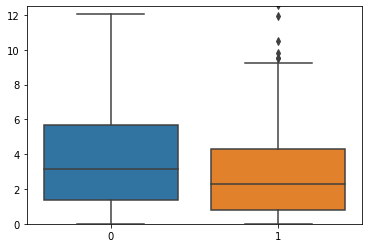

In [67]:
import seaborn as sb
import pandas as pd

df = pd.DataFrame(distriextl250,columns=['low'])

df2 = pd.DataFrame(distriexth250,columns=['high'])

ax = sb.boxplot(data=[df,df2])
ax.set(ylim=(0, 12.5))

[(0.0, 10.0)]

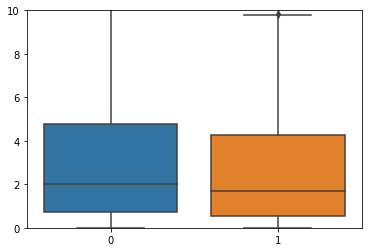

In [68]:
import seaborn as sb
import pandas as pd

df = pd.DataFrame(distrineutop500l250,columns=['low'])

df2 = pd.DataFrame(distrineutop500h250,columns=['high'])

ax = sb.boxplot(data=[df,df2])
ax.set(ylim=(0, 10))

## My Analysis

In [69]:
a,b = Get_Users_topandbottom(PerCorrLH, 'ext',  252)
mannwhitneyu_bootstrap(a, b, 10000)

'21050.0, 0.012039444303633934(Low, 0.014)'

In [70]:
PerCorrLH[0].keys()

dict_keys(['Total_song_plays', 'Total_unique_songs', 'Ext_song_plays', 'Ext_unique_songs', 'Non_Instr_song_plays', 'Non_Instr_unique_songs', 'Instr_unique_song_plays', 'Instr_unique_songs', 'freq', 'Joy', 'Angry', 'Sad', 'Relaxed', 'open', 'con', 'ext', 'agr', 'neu'])

In [71]:
plays = []
for i in range(len(PerCorrLH)):
    plays.append(PerCorrLH[i]['Total_song_plays'])

In [72]:
np.mean(np.array(plays))

23600.090476190475

In [73]:
unique = []
for i in range(len(PerCorrLH)):
    unique.append(PerCorrLH[i]['Total_unique_songs'])

In [74]:
np.mean(np.array(unique))

4266.691836734693

In [75]:
hitrate = []
for i in range(len(PerCorrLH)):
    hitrate.append(PerCorrLH[i]['Ext_song_plays']/PerCorrLH[i]['Total_song_plays'])

In [76]:
np.median(np.array(hitrate))

0.8587079202950765

In [77]:
uniquei = []
for i in range(len(PerCorrLH)):
    uniquei.append(PerCorrLH[i]['Instr_unique_song_plays'])

In [78]:
np.mean(np.array(uniquei))

1091.4210884353743

In [79]:
instr = []
for i in range(len(PerCorrLH)):
    instr.append(PerCorrLH[i]['Instr_unique_songs'])

In [80]:
np.mean(np.array(instr))

219.9734693877551

In [81]:
(distrineutop500l250).sort()

In [82]:
np.median(distrineutop500l250)

2.0029864579578804

In [83]:
(distrineutop500h250).sort()

In [84]:
np.median(distrineutop500h250)

1.675468295487672

# mean

In [85]:
distrineutop500l250,distrineutop500h250 = Get_Users_topandbottom(PerCorrtop500, 'neu', 275)

In [86]:
len(distrineutop500l250)*len(distrineutop500l250)/2

21424.5

In [87]:
mannwhitneyu_bootstrap(distrineutop500l250, distrineutop500h250, 10000)

'24817.5, 0.09040476303912949(Low, )'

In [88]:
for i in range(250,500):
    distriexttopl250,distriexttoph250 = Get_Users_topandbottom(PerCorrtop500, 'ext', i)
    a = mannwhitneyu_bootstrap(distriexttopl250, distriexttoph250, 10000)
    print(a)

18099.0, 0.17815234393317947(Low, )
18240.0, 0.16524183392326564(Low, )
18421.0, 0.14216788803169358(Low, )
18551.0, 0.13349858656401312(Low, )
18717.0, 0.14158131244653935(Low, )
18932.0, 0.13728228991289088(Low, )
18958.0, 0.15738163318315512(Low, )
19105.0, 0.14489874996835764(Low, )
19231.0, 0.16526400531121466(Low, )
19355.0, 0.15887103314719986(Low, )
19590.0, 0.14978634469955837(Low, )
19822.0, 0.142249646000729(Low, )
20004.0, 0.14781827885852183(Low, )
20059.0, 0.19000589025614412(Low, )
20104.0, 0.243629459551285(Low, )
20407.0, 0.20965612584063176(Low, )
20531.0, 0.20319479402007867(Low, )
20753.0, 0.19847743102503246(Low, )
20847.0, 0.2012697990087151(Low, )
21116.0, 0.1831642327286851(Low, )
21216.0, 0.1842313594126297(Low, )
21216.0, 0.1842313594126297(Low, )
21306.0, 0.18896447222600843(Low, )
21327.0, 0.2151056458694074(Low, )
21440.0, 0.24792590754101151(Low, )
21575.0, 0.27555860738827953(Low, )
21840.0, 0.25604616929052904(Low, )
22061.5, 0.253029512330187(Low, )
221

68370.5, 0.27612070310569936(Low, )
68554.5, 0.27720847881304644(Low, )
68637.5, 0.2933196380480221(Low, )
69153.5, 0.27107461675242883(Low, )
69153.5, 0.27107461675242883(Low, )
69213.5, 0.2918623364764821(Low, )
69642.5, 0.28355647295447917(Low, )
70039.5, 0.28058930082585387(Low, )
70611.5, 0.25172945110418776(Low, )
70633.5, 0.2772818088954496(Low, )
71106.5, 0.26340868474046697(Low, )
71478.5, 0.26490704244301755(Low, )
71489.5, 0.29294154181107324(Low, )
71754.5, 0.3118761224542398(Low, )
72315.5, 0.28377109933737665(Low, )
72912.5, 0.2526721847541836(Low, )
73041.5, 0.2907263505207377(Low, )


In [89]:
for i in range(274,500):
    distrineutop500l250,distrineutop500h250 = Get_Users_topandbottom(PerCorrtop500, 'neu', i)
    a = mannwhitneyu_bootstrap(distrineutop500l250, distrineutop500h250, 10000)
    if (a.split(',')[1].strip()[2]) == '0':
        print(i)

274
275
299


In [90]:
print("Neu",mannwhitneyu_bootstrap(distrineutop500l250, distrineutop500h250, 10000))

Neu 71801.5, 0.35779932054266084(Low, )


In [91]:
distrineul100,distrineuh100 = Get_Users_topandbottom(PerCorrLH, 'neu', 100)
distrineul250,distrineuh250 = Get_Users_topandbottom(PerCorrLH, 'neu', 250)

print(mean(distrineul100), mean(distrineuh100))
print(mean(distrineul250), mean(distrineuh250))

4.037945633781069 3.8767563737638038
4.11662262333731 3.788061465752265


In [92]:
distriagrl,distriagrh = Get_Users(PerCorrLH, 'neu', neu)

print(mean(distriagrl), mean(distriagrh))

4.672786672400843 4.120126885801317


In [93]:
PerCorrtop100[0]

{'Total_song_plays': 6,
 'Total_unique_songs': 6,
 'Ext_song_plays': 6,
 'Ext_unique_songs': 6,
 'Non_Instr_song_plays': 6,
 'Non_Instr_unique_songs': 6,
 'Instr_unique_song_plays': 0,
 'Instr_unique_songs': 0,
 'freq': [1, 1, 1, 1, 1, 1],
 'song': [2, 2, 2, 2, 2, 2],
 'Joy': -0.4227942315240701,
 'Angry': -0.2609129746754964,
 'Sad': 1.5501137971878052,
 'Relaxed': -0.31631347474952537,
 'open': 5.0,
 'con': 1.0,
 'ext': 4.75,
 'agr': 2.5,
 'neu': 4.0}